In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import torch
import gpytorch
import matplotlib.pyplot as plt
import xarray as xr
import tqdm
import utils as utils
import cartopy.crs as ccrs

base_dir = os.path.join(os.getcwd(), '..')
sys.path.append(base_dir)

import src.evaluation.visualisation as vis

# Bias comparison plot

In [3]:
FaIR_pattern_scaling = {
    'ssp126': xr.open_dataarray('./netcdf/bias-ssp126-FaIR-pattern-scaling.nc'),
    'ssp245': xr.open_dataarray('./netcdf/bias-ssp245-FaIR-pattern-scaling.nc'),
    'ssp585': xr.open_dataarray('./netcdf/bias-ssp585-FaIR-pattern-scaling.nc'),
}

PlainGP = {
    'ssp126': xr.open_dataarray('./netcdf/bias-ssp126-PlainGP.nc'),
    'ssp245': xr.open_dataarray('./netcdf/bias-ssp245-PlainGP.nc'),
    'ssp585': xr.open_dataarray('./netcdf/bias-ssp585-PlainGP.nc'),
}

FaIRGP = {
    'ssp126': xr.open_dataarray('./netcdf/bias-ssp126-FaIRGP.nc'),
    'ssp245': xr.open_dataarray('./netcdf/bias-ssp245-FaIRGP.nc'),
    'ssp585': xr.open_dataarray('./netcdf/bias-ssp585-FaIRGP.nc'),
}

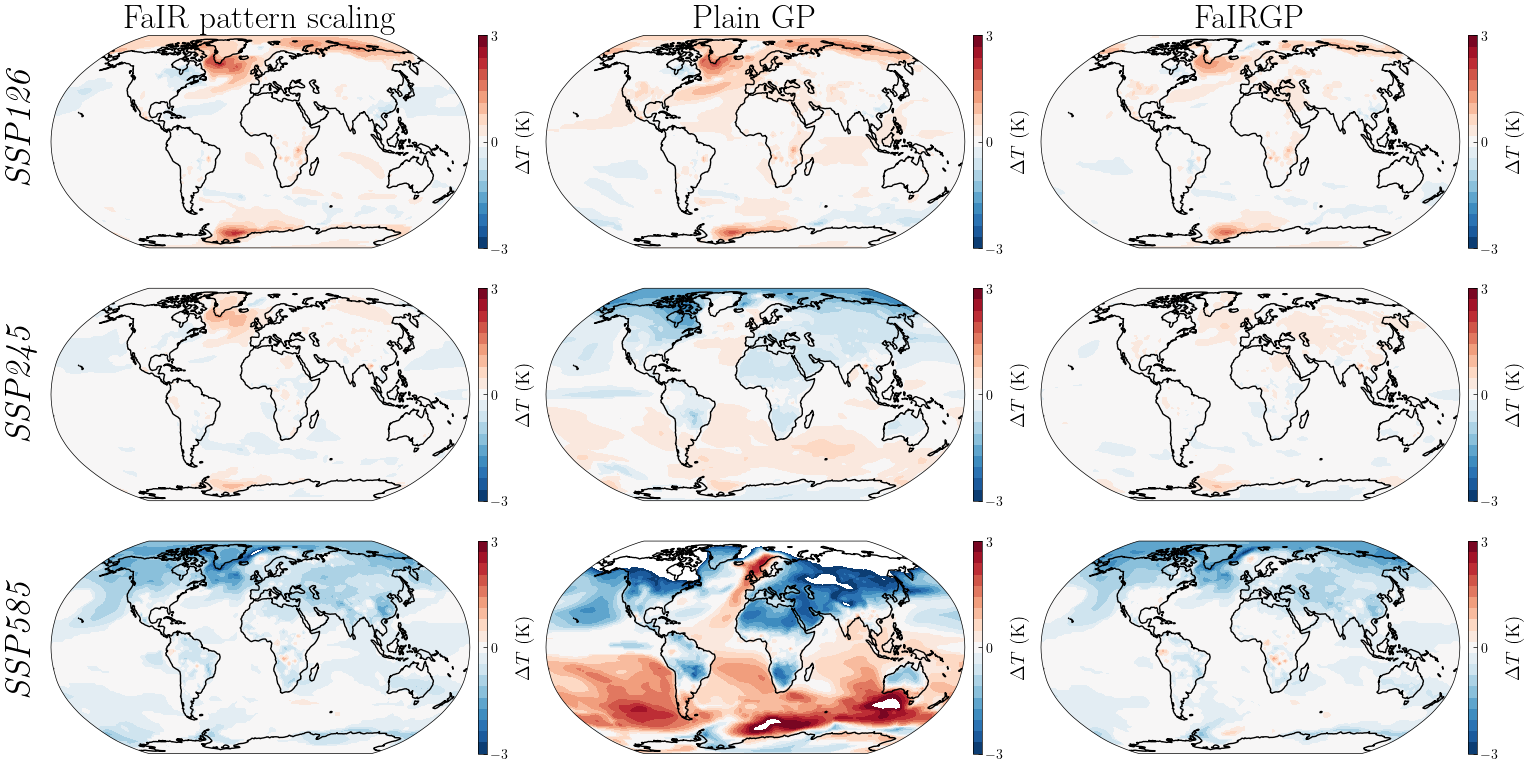

In [5]:
start, end = 2080, 2100
time_slice = slice(start, end)
SSPs = ['ssp126', 'ssp245', 'ssp585']

vmax = 3
ticks = [-vmax, 0, vmax]

fig, ax = plt.subplots(3, 3, figsize=(15, 8), subplot_kw={'projection': ccrs.Robinson()})

for i, ssp in enumerate(SSPs):
    _, __, cbar = vis.plot_contourf_on_ax(FaIR_pattern_scaling[ssp].sel(time=time_slice).mean(dim='time'), 
                                          fig, ax[i, 0], colorbar=True, vmax=vmax)
    cbar.set_ticks(ticks)
    _, __, cbar = vis.plot_contourf_on_ax(PlainGP[ssp].sel(time=time_slice).mean(dim='time'), 
                                          fig, ax[i, 1], colorbar=True, vmax=vmax)
    cbar.set_ticks(ticks)
    _, __, cbar = vis.plot_contourf_on_ax(FaIRGP[ssp].sel(time=time_slice).mean(dim='time'), 
                                          fig, ax[i, 2], colorbar=True, vmax=vmax)
    cbar.set_ticks(ticks)

ax[0, 0].set_title("FaIR pattern scaling", fontsize=24)
ax[0, 1].set_title("Plain GP", fontsize=24)
ax[0, 2].set_title("FaIRGP", fontsize=24)
    
fig.text(-0.01, 0.82, r'\textit{SSP126}', ha='center', va='center', rotation='vertical', fontsize=26)
fig.text(-0.01, 0.50, r'\textit{SSP245}', ha='center', va='center', rotation='vertical', fontsize=26)
fig.text(-0.01, 0.18, r'\textit{SSP585}', ha='center', va='center', rotation='vertical', fontsize=26)

plt.tight_layout()
# plt.savefig('./figures/SSP-spatial-bias-paper-plot.png', dpi=200)
plt.show()

# CR calibration plots

In [6]:
PlainGP = {
    'ssp126': xr.open_dataarray('./netcdf/isinCR-ssp126-PlainGP.nc'),
    'ssp245': xr.open_dataarray('./netcdf/isinCR-ssp245-PlainGP.nc'),
    'ssp585': xr.open_dataarray('./netcdf/isinCR-ssp585-PlainGP.nc'),
}

FaIRGP = {
    'ssp126': xr.open_dataarray('./netcdf/isinCR-ssp126-FaIRGP.nc'),
    'ssp245': xr.open_dataarray('./netcdf/isinCR-ssp245-FaIRGP.nc'),
    'ssp585': xr.open_dataarray('./netcdf/isinCR-ssp585-FaIRGP.nc'),
}

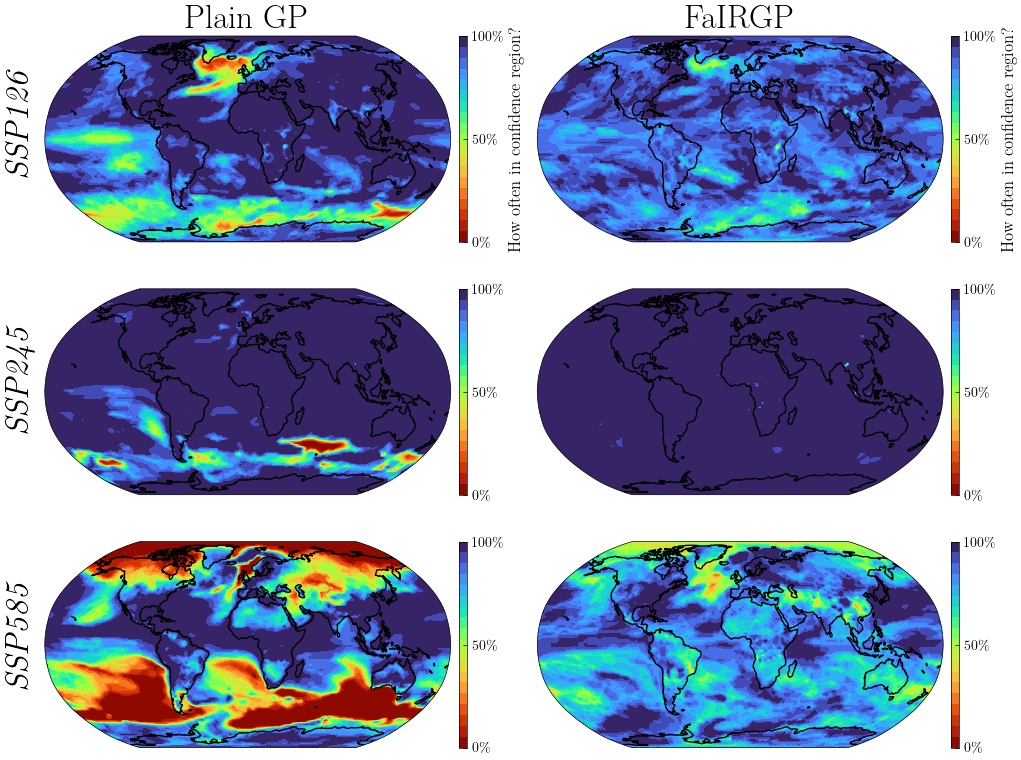

In [7]:
start, end = 2080, 2100
time_slice = slice(start, end)
SSPs = ['ssp126', 'ssp245', 'ssp585']

# vmax = 3
# ticks = [-vmax, 0, vmax]

fig, ax = plt.subplots(3, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.Robinson()})

for i, ssp in enumerate(SSPs):
    _, __, cbar = vis.plot_contourf_on_ax(PlainGP[ssp].sel(time=time_slice).mean(dim='time'), 
                                          fig, ax[i, 0], colorbar=True, vmin=0., vmax=1.,
                                          cmap='turbo_r')
    cbar.set_ticks([0, 0.5, 1])
    cbar.set_ticklabels(['0\%', '50\%', '100\%'])
    cbar.set_label('')
    if i == 0:
        cbar.set_label('How often in confidence region?', fontsize=12)

    _, __, cbar = vis.plot_contourf_on_ax(FaIRGP[ssp].sel(time=time_slice).mean(dim='time'), 
                                          fig, ax[i, 1], colorbar=True, vmin=0., vmax=1.,
                                          cmap='turbo_r')
    cbar.set_ticks([0, 0.5, 1])
    cbar.set_ticklabels(['0\%', '50\%', '100\%'])
    cbar.set_label('')
    if i == 0:
        cbar.set_label('How often in confidence region?', fontsize=12)

ax[0, 0].set_title("Plain GP", fontsize=24)
ax[0, 1].set_title("FaIRGP", fontsize=24)
    
fig.text(-0.01, 0.82, r'\textit{SSP126}', ha='center', va='center', rotation='vertical', fontsize=24)
fig.text(-0.01, 0.50, r'\textit{SSP245}', ha='center', va='center', rotation='vertical', fontsize=24)
fig.text(-0.01, 0.18, r'\textit{SSP585}', ha='center', va='center', rotation='vertical', fontsize=24)

plt.tight_layout()
# plt.savefig('./figures/SSP-spatial-isinCR-paper-plot.png', dpi=200)
plt.show()